In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

import matplotlib.pyplot as plt
from lime import lime_image
from keras.applications.vgg16 import VGG16

from unboxer.class_heatmap import ClassHeatmap
from unboxer.utils import prep_model_for_vis

Using TensorFlow backend.


In [10]:
model = VGG16(weights='imagenet', include_top=True)
model.get_layer('predictions').activation

<function keras.activations.softmax>

In [11]:
model = prep_model_for_vis(model)
model.get_layer('predictions').activation

<function keras.activations.linear>

In [5]:
cam = ClassHeatmap(cam_model=prep_model, img_shape=(224,224))

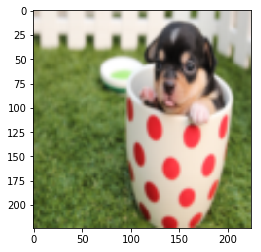

In [24]:
IMG_PATH = '/mnt/ml-team/homes/jakub.czakon/.unblackboxing_webinar_data/data/dogs/input/dog_in_a_mug.png'
img = plt.imread(IMG_PATH)
plt.imshow(img)
plt.show()

(u'Rottweiler', 0.1439541)
(u'black-and-tan_coonhound', 0.13884005)
(u'bluetick', 0.12469053)
(u'Gordon_setter', 0.068693064)
(u'Brabancon_griffon', 0.052342698)


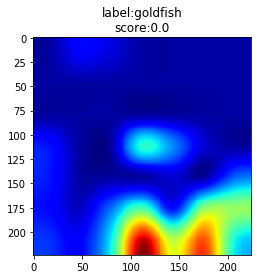

<function unboxer.class_heatmap._plot>

In [25]:
cam.plot_cam(img_path=IMG_PATH)

(u'Rottweiler', 0.1439541)
(u'black-and-tan_coonhound', 0.13884005)
(u'bluetick', 0.12469053)
(u'Gordon_setter', 0.068693064)
(u'Brabancon_griffon', 0.052342698)


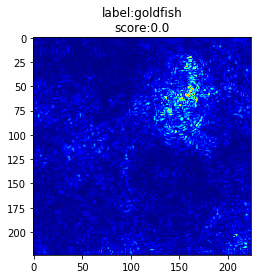

<function unboxer.class_heatmap._plot>

In [26]:
cam.plot_saliency(img_path=IMG_PATH)